# Task 1

Write an algorithm for finding the minimum by the gradient descent method.
Present it for the function $f(x)=x^2$, starting from $x=2$ and illustrate it by marking the first 5 iterations on the figure.



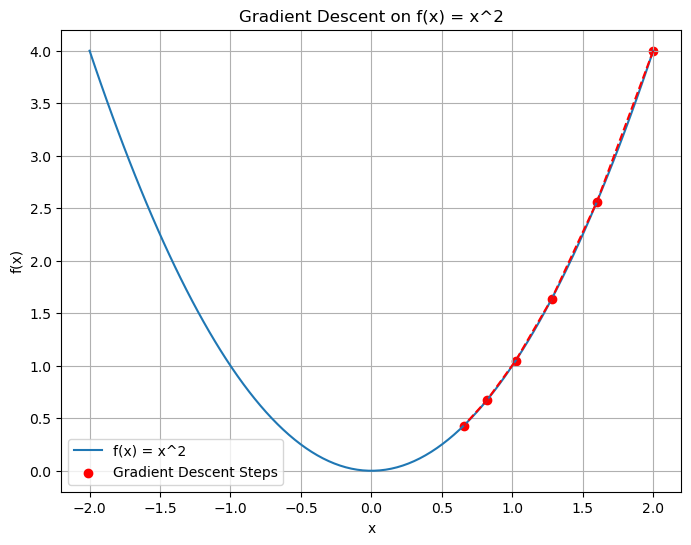

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sym

f = lambda x : x**2

x=sym.Symbol('x')
f_prime=sym.diff(f(x))

f_prime = sym.lambdify(x, f_prime)

learning_rate = 0.1
iterations = 5
x_current = 2  

x_values = [x_current]
y_values = [f(x_current)]

for _ in range(iterations):
    gradient = f_prime(x_current)
    x_current -= learning_rate * gradient
    x_values.append(x_current)
    y_values.append(f(x_current))

x_range = np.linspace(-2, 2, 100)
y_range = f(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label="f(x) = x^2")
plt.scatter(x_values, y_values, color='red', label="Gradient Descent Steps")
plt.plot(x_values, y_values, color='red', linestyle='--')
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


In [1]:
### Find Maximum

f = lambda x : -x**2

x=sym.Symbol('x')
f_prime=sym.diff(f(x))

f_prime = sym.lambdify(x, f_prime)

learning_rate = 0.1
iterations = 5
x_current = 2  

x_values = [x_current]
y_values = [f(x_current)]

for _ in range(iterations):
    gradient = f_prime(x_current)
    x_current = learning_rate * gradient
    x_values.append(x_current)
    y_values.append(f(x_current))

x_range = np.linspace(-2, 2, 100)
y_range = f(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label="f(x) = x^2")
plt.scatter(x_values, y_values, color='red', label="Gradient Descent Steps")
plt.plot(x_values, y_values, color='red', linestyle='--')
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

NameError: name 'sym' is not defined

# Task 2

Write an algorithm for finding the minimum by the gradient descent method.
Present it for the function $f(x,y)=x^2-2x+y^2$, starting from $(x,y)=(2,2)$ and illustrate it by marking the first 5 iterations on the figure.

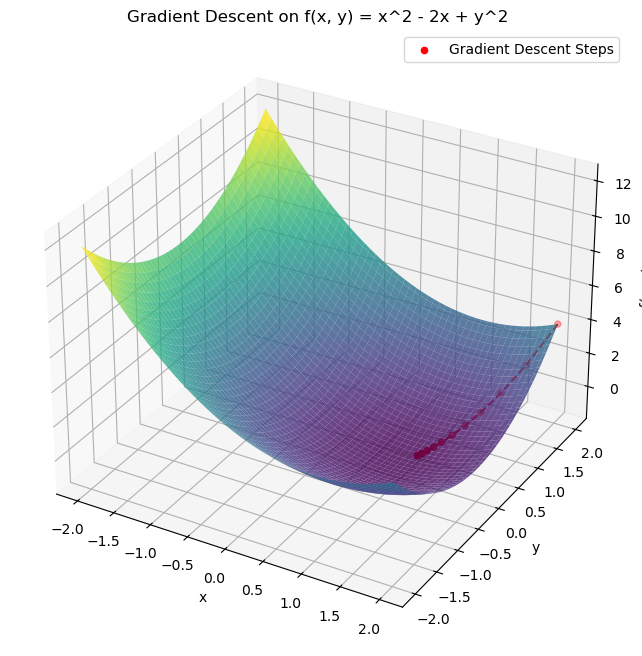

In [ ]:
f = lambda x,y : x**2 - 2*x + y**2

## calculate gradient
x,y = sym.symbols('x y')
f_prime_x = sym.diff(f(x,y),x)
f_prime_y = sym.diff(f(x,y),y)
f_prime = sym.lambdify((x,y), [f_prime_x, f_prime_y])

earning_rate = 0.1
iterations = 10
x_y_current = [2.0,2.0]

x_y_values = [x_y_current]
z_values = [f(x_y_current[0], x_y_current[1])]

for _ in range(iterations):
    gradient = f_prime(x_y_current[0], x_y_current[1])
    x_y_current = [x_y_current[i] - learning_rate * gradient[i] for i in range(len(x_y_current))]
    x_y_values.append(x_y_current)
    z_values.append(f(x_y_current[0], x_y_current[1]))


# Create a 3D static figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the gradient descent steps
x_vals = [point[0] for point in x_y_values]
y_vals = [point[1] for point in x_y_values]
z_vals = z_values
ax.scatter(x_vals, y_vals, z_vals, color='red', label='Gradient Descent Steps')
ax.plot(x_vals, y_vals, z_vals, color='red', linestyle='--')

# Labels and title
ax.set_title("Gradient Descent on f(x, y) = x^2 - 2x + y^2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.show()


# Task 3


Write an algorithm for finding the minimum by the gradient descent method.
Present it for the function $f(x,y)=x^2-y^2$, starting from $(x,y)=(5,1)$ and illustrate it by marking the first 5 iterations on the figure.

Create:
  * 2D conture plot   (e.g. https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html)
  * 3D 
  
  What happens when we change a starting point into $(5,0)$?



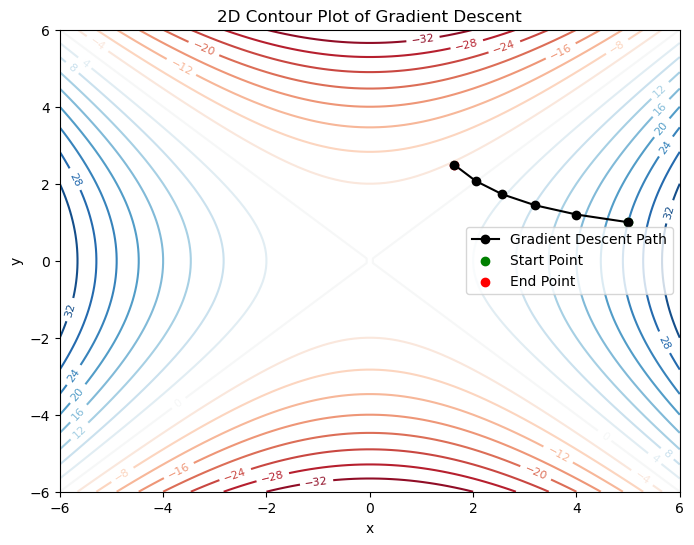

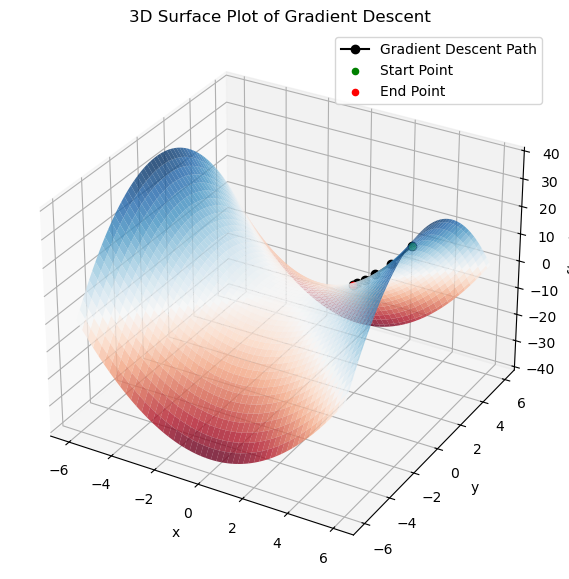

Path for starting point (5, 0): [(5, 0), (4.0, 0.0), (3.2, 0.0), (2.56, 0.0), (2.048, 0.0), (1.6384, 0.0)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return x**2 - y**2

def gradient(x, y):
    df_dx = 2 * x
    df_dy = -2 * y
    return np.array([df_dx, df_dy])

# Gradient descent algorithm
def gradient_descent(starting_point, learning_rate, iterations):
    points = [starting_point]
    x, y = starting_point
    for _ in range(iterations):
        grad = gradient(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        points.append((x, y))
    return points

# Parameters
starting_point = (5, 1)
learning_rate = 0.1
iterations = 5

# Perform gradient descent
points = gradient_descent(starting_point, learning_rate, iterations)

# Extract x and y values for plotting
x_vals = [p[0] for p in points]
y_vals = [p[1] for p in points]

# Create a grid for plotting
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 2D Contour Plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap="RdBu")
plt.clabel(contour, inline=True, fontsize=8)
plt.plot(x_vals, y_vals, 'o-', color='black', label='Gradient Descent Path')
plt.scatter(x_vals[0], y_vals[0], color='green', label='Start Point')
plt.scatter(x_vals[-1], y_vals[-1], color='red', label='End Point')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Contour Plot of Gradient Descent')
plt.legend()
plt.show()

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="RdBu", alpha=0.8)
ax.plot(x_vals, y_vals, f(np.array(x_vals), np.array(y_vals)), 'o-', color='black', label='Gradient Descent Path')
ax.scatter(x_vals[0], y_vals[0], f(x_vals[0], y_vals[0]), color='green', label='Start Point')
ax.scatter(x_vals[-1], y_vals[-1], f(x_vals[-1], y_vals[-1]), color='red', label='End Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface Plot of Gradient Descent')
plt.legend()
plt.show()

# What happens when starting point is (5, 0)?
starting_point_2 = (5, 0)
points_2 = gradient_descent(starting_point_2, learning_rate, iterations)
x_vals_2 = [p[0] for p in points_2]
y_vals_2 = [p[1] for p in points_2]

print("Path for starting point (5, 0):", points_2)

# Task 4
Define a square error function:

$$
\mathrm{compute\_error}(a,b) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

and use a gradient descent method from Task 2 to find a minimum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

f = lambda x: (x**2)


x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))


# Task 5
Use the function <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html
to find a minimum of the functions:

* $
f(x,y) = (x+1)^2+y^2
$

* $\mathrm{compute\_error}(a,b)$ (by parameters $a,b$)

Minimalized the function $\mathrm{compute\_error}(a,b)$ by <tt>optimize.fmin_cg</tt> (by parameters $a,b$)

In [ ]:
from scipy import optimize


# Task 6
Define an error function::

$$
\mathrm{compute\_error\_1}(a,b) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

and find minimum. Compare it with the minimum of error square function ($\mathrm{compute\_error}(a,b)$).


[2.95857923]
-1.2008429647415624


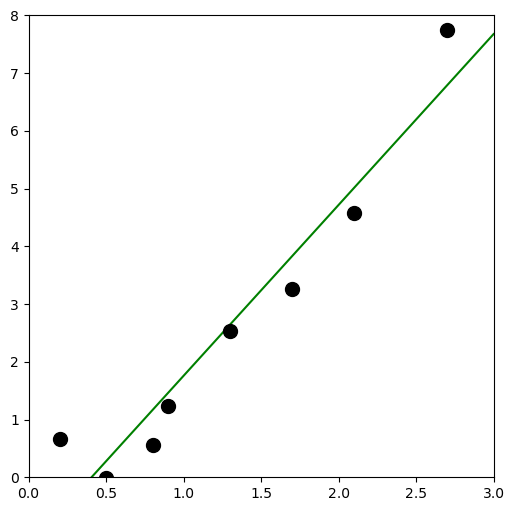

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

f = lambda x: (x**2)


x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))

x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)

# model.
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

f_lr = lambda x: lr.coef_ * x +lr.intercept_

x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
#plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()